## 展示数据类型

In [162]:
import yaml
import os
import json
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from pdf2image import convert_from_path
import cv2

In [6]:
dataset_dir = '/Volumes/Disk/Dataset/tsr/SciTSR'
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

In [7]:
# list dir of train and test
os.listdir(train_dir), os.listdir(test_dir)

(['chunk', 'pdf', 'img', 'rel', 'structure'],
 ['chunk', 'pdf', 'img', 'structure'])

### show chunk file

In [8]:
chunk_file = os.path.join(train_dir, 'chunk', '0902.1033v1.4.chunk')
with open(chunk_file, 'r') as f:
    chunk = json.load(f)
chunk

{'chunks': [{'pos': [257.1080017089844,
    289.4609069824219,
    463.1910095214844,
    466.67791748046875],
   'text': 'threshold'},
  {'pos': [302.072998046875,
    318.8993835449219,
    463.1910095214844,
    466.67791748046875],
   'text': 'CER'},
  {'pos': [331.9049987792969,
    349.2572021484375,
    463.1910095214844,
    466.67791748046875],
   'text': 'CAR'},
  {'pos': [362.04901123046875,
    379.30426025390625,
    463.1910095214844,
    466.67791748046875],
   'text': 'CRR'},
  {'pos': [391.7019958496094,
    427.7969970703125,
    463.1910095214844,
    466.67791748046875],
   'text': 'F-measure'},
  {'pos': [183.4499969482422,
    212.81735229492188,
    454.0740051269531,
    457.5609130859375],
   'text': 'intra-MI'},
  {'pos': [257.65301513671875,
    288.4172668457031,
    454.0740051269531,
    460.48321533203125],
   'text': '3.6 · 10 − 5'},
  {'pos': [301.4150085449219,
    319.55670166015625,
    454.0740051269531,
    457.5609130859375],
   'text': '0.383'},


### show rel file

In [9]:
rel_file = os.path.join(train_dir, 'rel', '0704.2596v1.2.rel')
with open(rel_file, 'r') as f:
    for line in f:
        print(line)

0	1	1:0

0	10	2:0

1	2	1:0

1	11	2:0

2	3	1:0

2	12	2:0

3	4	1:0

3	13	2:0

4	5	1:0

4	14	2:0

5	15	2:0

7	17	2:0

9	19	2:0

10	11	1:0

10	20	2:0

11	12	1:0

11	21	2:0

12	13	1:0

12	22	2:0

13	14	1:0

13	23	2:0

14	15	1:0

14	24	2:0

15	16	1:0

15	25	2:0

16	17	1:0

16	26	2:0

17	18	1:0

17	27	2:0

18	19	1:0

18	28	2:0

19	29	2:0

20	21	1:0

20	30	2:0

21	22	1:0

21	31	2:0

22	23	1:0

22	32	2:0

23	24	1:0

23	33	2:0

24	25	1:0

24	34	2:0

25	26	1:0

25	35	2:0

26	27	1:0

26	36	2:0

27	28	1:0

27	37	2:0

28	29	1:0

28	38	2:0

29	39	2:0

30	31	1:0

30	40	2:0

31	32	1:0

31	41	2:0

32	33	1:0

32	42	2:0

33	34	1:0

33	43	2:0

34	35	1:0

34	44	2:0

35	36	1:0

35	45	2:0

36	37	1:0

36	46	2:0

37	38	1:0

37	47	2:0

38	39	1:0

38	48	2:0

39	49	2:0

40	41	1:0

40	50	2:0

41	42	1:0

41	51	2:0

42	43	1:0

42	52	2:0

43	44	1:0

43	53	2:0

44	45	1:0

44	54	2:0

45	46	1:0

45	55	2:0

46	47	1:0

46	56	2:0

47	48	1:0

47	57	2:0

48	49	1:0

48	58	2:0

49	59	2:0

50	51	1:0

50	60	2:0

51	52	1:0

51	61	

### show structure file

In [10]:
structure_file = os.path.join(train_dir, 'structure', '0909.1594v1.3.json')
with open(structure_file, 'r') as f:
    structure = json.load(f)
structure

{'cells': [{'id': 5,
   'tex': 'Momentum',
   'content': ['Momentum'],
   'start_row': 2,
   'end_row': 2,
   'start_col': 1,
   'end_col': 1},
  {'id': 6,
   'tex': 'Program',
   'content': ['Program'],
   'start_row': 3,
   'end_row': 3,
   'start_col': 0,
   'end_col': 0},
  {'id': 1,
   'tex': 'Hamilton dynamic',
   'content': ['Hamilton', 'dynamic'],
   'start_row': 0,
   'end_row': 0,
   'start_col': 1,
   'end_col': 1},
  {'id': 0,
   'tex': 'Abstract computing',
   'content': ['Abstract', 'computing'],
   'start_row': 0,
   'end_row': 0,
   'start_col': 0,
   'end_col': 0},
  {'id': 4,
   'tex': 'Inner state',
   'content': ['Inner', 'state'],
   'start_row': 2,
   'end_row': 2,
   'start_col': 0,
   'end_col': 0},
  {'id': 9,
   'tex': 'Dynamics',
   'content': ['Dynamics'],
   'start_row': 4,
   'end_row': 4,
   'start_col': 1,
   'end_col': 1},
  {'id': 2,
   'tex': 'Tape state',
   'content': ['Tape', 'state'],
   'start_row': 1,
   'end_row': 1,
   'start_col': 0,
   'end_

## Process image

In [176]:
images = convert_from_path(os.path.join(train_dir, 'pdf', '0902.1033v1.4.pdf'), dpi=150)
images[0].save(os.path.join(train_dir, 'pdf_to_img', '0902.1033v1.4.png'), 'PNG')

In [163]:
def crop(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    thresh, gray = cv2.threshold(
        img, 200, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    coords = cv2.findNonZero(gray)
    x, y, w, h = cv2.boundingRect(coords)
    left, top, right, bottom = x - 3, y - 3, x + w + 3, y + h + 3
    rect = img[top:bottom, left:right]
    # cv2.imwrite(img_path, rect)
    return left, top, right, bottom

In [170]:
def convert(x, y, img_path):
    left, top, right, bottom = crop(img_path)
    ratio = 1754 / 842
    new_x = x * ratio - left
    new_y = 1754 - y * ratio - top
    return new_x, new_y

In [177]:
# show image of pdf2image
image_path = os.path.join(train_dir, 'pdf_to_img', '0902.1033v1.4.png')
img = Image.open(image_path)

# for cell in chunk['chunks']:
#     x_min, x_max, y_min, y_max = cell['pos']
#     x_min, y_min = convert(x_min, y_min, img_path=image_path)
#     x_max, y_max = convert(x_max, y_max, img_path=image_path)
#     text = cell['text']
#     draw = ImageDraw.Draw(img)
#     draw.rectangle([x_min, y_min, x_max, y_max], outline='red')

img.show()

In [143]:

for i, image in enumerate(images):
    draw = ImageDraw.Draw(image)
    for cell in chunk['chunks']:
        x_min, x_max, y_min, y_max = cell['pos']
        draw.rectangle(((x_min, y_min), (x_max, y_max)), outline='red')

    image.save(f'./{i}.png')

### 将文件路径组装成csv

In [11]:
# train
sub_item = os.listdir(train_dir)
train_map = {}
for item in tqdm(sub_item):
    item_list = os.listdir(os.path.join(train_dir, item))
    ext = item_list[0].split('.')[-1]
    table_names = [x.replace('.'+ext, '') for x in item_list]
    for tn in table_names:
        if tn not in train_map:
            train_map[tn] = []
        train_map[tn] += [os.path.join(item, tn+'.'+ext)]
# convert to dataframe
train_df = pd.DataFrame.from_dict(train_map, orient='index', columns=sub_item)

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


In [12]:
# train_df.to_csv(os.path.join(dataset_dir, 'train.csv'), index=True, index_label='table_name')

In [13]:
sub_item = os.listdir(test_dir)
test_map = {}
for item in tqdm(sub_item):
    item_list = os.listdir(os.path.join(test_dir, item))
    ext = item_list[0].split('.')[-1]
    table_names = [x.replace('.'+ext, '') for x in item_list]
    for tn in table_names:
        if tn not in test_map:
            test_map[tn] = []
        test_map[tn] += [os.path.join(item, tn+'.'+ext)]
# convert to dataframe
test_df = pd.DataFrame.from_dict(test_map, orient='index', columns=sub_item)

100%|██████████| 4/4 [00:05<00:00,  1.33s/it]


In [14]:
# test_df.to_csv(os.path.join(dataset_dir, 'test.csv'), index=True, index_label='table_name')

### 查看单元格个数在各个表格中的数量分布

In [19]:
# for train set

def get_cell_count(table_path):
    with open(table_path, 'r') as f:
        cell_len = len(json.load(f)['cells'])
        f.close()
    return cell_len

cell_count = []
train_values = train_df.values

In [26]:
for i in tqdm(range(len(train_values))):
    cell_count.append(get_cell_count(os.path.join(train_dir, train_values[i, 4])))
train_df['cell_count'] = cell_count

100%|██████████| 12000/12000 [00:45<00:00, 263.63it/s] 


In [38]:
train_df['cell_count'].describe()

count    12000.000000
mean        47.735917
std         60.076874
min          4.000000
25%         19.000000
50%         30.000000
75%         54.000000
max       1788.000000
Name: cell_count, dtype: float64

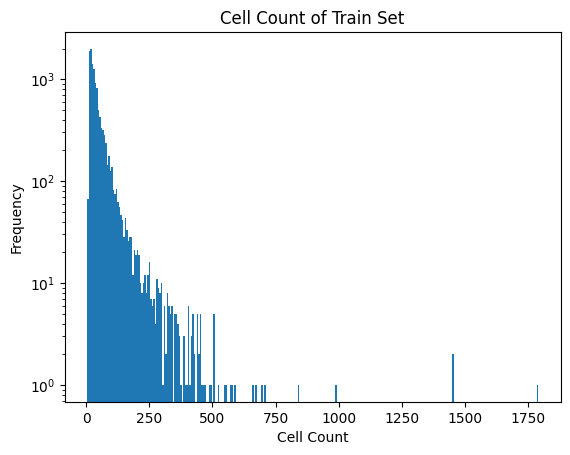

In [45]:
# plot cell count of train set
plt.hist(train_df['cell_count'], bins=300)
plt.title('Cell Count of Train Set')
plt.xlabel('Cell Count')
plt.ylabel('Frequency')
# log scale
plt.yscale('log')
plt.show()

In [109]:
# cell_count大于500的占多少
1- len(train_df[train_df['cell_count'] > 500]) / len(train_df)

0.9983333333333333

### 测试data文件夹下的数据集类是否编写正确

In [1]:
from data.scitsr import SciTSRDataset
from config import Config
from torch.utils.data import DataLoader
args = Config('./configs/ncgm.yaml')

In [2]:
scitsr_dataset = SciTSRDataset(args)
dataloader = DataLoader(scitsr_dataset, batch_size=8, shuffle=False)

2023-04-07 16:20:26.078 | DEBUG    | data.scitsr:__init__:25 - Word2vec loaded from /Volumes/Disk/Dataset/word2vec/GoogleNews-vectors-negative300.bin


In [4]:
for i, data in enumerate(dataloader):
    print(data)
    break

RuntimeError: each element in list of batch should be of equal size

In [55]:
import gensim

word2vec = gensim.models.KeyedVectors.load_word2vec_format(args['train.dataset.word2vec.path'], binary=True)

In [87]:
# embedding a sentence, embedding vector length should be
def embedding_sentence(sentence, word2vec):
    sentence = sentence.lower()
    words = sentence.split(' ')
    vec = []
    for word in words:
        if word in word2vec:
            vec.append(word2vec[word])
    return vec

import torch
torch.tensor(embedding_sentence('asd ss', word2vec)).shape

/var/folders/22/vypqh1xj09z8px8tnx68s_640000gn/T/ipykernel_51420/1236706198.py:12: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1678454852765/work/torch/csrc/utils/tensor_new.cpp:248.)
  torch.tensor(embedding_sentence('asd ss', word2vec)).shape


torch.Size([2, 300])

In [111]:
conv = torch.nn.Conv2d(200, 64, (7, 1), stride=1)
a = torch.ones((8 * 500, 200, 7, 1)) # batch_size, num_emb, seq_len, new_dim
conv(a).shape

torch.Size([4000, 64, 1, 1])

In [112]:
torch

<module 'torch' from '/Users/tanknee/miniforge3/envs/tsr/lib/python3.10/site-packages/torch/__init__.py'>